<a href="https://colab.research.google.com/github/AVANTHI72/MAIN-FLOW-internship/blob/main/image_detection_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import tensorflow as tf
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.applications import*
from tensorflow.keras.models import*
from tensorflow.keras.layers import*
from tensorflow.keras.utils import load_img

In [31]:
lt=[cv2.ROTATE_180,cv2.ROTATE_90_COUNTERCLOCKWISE,cv2.ROTATE_90_CLOCKWISE]
def brightness(img):
  value=random.uniform(0.5,2)
  hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
  hsv=np.array(hsv,dtype=np.float64)
  hsv[:,:,1]=hsv[:,:,1]*value
  hsv[:,:,1][hsv[:,:,1]>255]=255
  hsv[:,:,2]=hsv[:,:,2]*value
  hsv[:,:,2][hsv[:,:,2]>255]=255
  hsv=np.array(hsv,dtype=np.uint8)
  img=cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
  return img

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import pathlib
import glob
directory=pathlib.Path("/content/drive/My Drive/image detection")
resultant="/content/augmentedimages"
import os
import random
import cv2
items=os.listdir(directory)
classes=[]
count=0
images=[]
labels=[]
for i in items:
  i1=0
  print(i)
  classes.append(i)
  path1=f"{directory}/{i}"
  a=random.randint(5,10)
  img=cv2.imread(path1)
  img=cv2.resize(img,(224,224))
  k=i.split(".")[0]
  cv2.imwrite(f"{resultant}\{k}{i1}.jpeg",img)
  i1+=1
  while a!=0:
    img=cv2.rotate(img,lt[random.randint(0,2)])

    images.append(img)
    cv2.imwrite(f"{resultant}\{k}{i1}.jpeg",img)
    i1+=1
    labels.append(count)
    if a%2==0:
       img=brightness(img)
       images.append(img)
       cv2.imwrite(f"{resultant}\{k}{i1}.jpeg",img)
       i1+=1
       labels.append(count)
    a-=1
  count+=1
images=np.array(images)
labels=np.array(labels)


pw pic 3.jpeg
pw pic4.jpeg
pw pic5.jpeg
pw pic2.jpeg
pw pic1.jpeg


In [34]:
images.shape

(44, 224, 224, 3)

In [35]:
from keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.models import *
from keras.applications.vgg16 import VGG16,preprocess_input

In [36]:
model=VGG16(weights="imagenet")
for i in model.layers:
  i.trainable=False
len(model.layers)

23

In [37]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 138,357,544 (527.79 MB)

In [38]:
transferVGG= Sequential()

In [41]:
"""from torchvision import transforms
for i in range(18):
  transferVGG.add(model.layers[i])
transferVGG.add(Flatten())
transferVGG.add(Dense(512,activation="relu"))
transferVGG.add(Dense(128,activation="relu"))
transferVGG.add(Dense(12,activation="softmax"))
transferVGG.summary()"""
!pip install torchvision
from keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.models import *
from keras.applications.vgg16 import VGG16,preprocess_input
from torchvision import transforms

model=VGG16(weights="imagenet")
for i in model.layers:
  i.trainable=False

# Create a new Sequential model with the correct input shape
transferVGG = Sequential(layers=model.layers[:18]) # Add the first 18 layers from VGG16 directly

transferVGG.add(Flatten())
transferVGG.add(Dense(512,activation="relu"))
transferVGG.add(Dense(128,activation="relu"))
transferVGG.add(Dense(12,activation="softmax"))
transferVGG.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 512)                 │      51,380,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 12)                  │           1,548 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 66,162,636 (252.39 MB)

 Trainable params: 51,447,948 (196.26 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [42]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    print("call")
    if(logs.get("accuracy")>.99):
      print("\nReached %2.2f%% accuracy,so stopping training!!"%(99))
      self.model.stop_training=True
callbacks=myCallback()

In [43]:
transferVGG.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
transferVGG.fit(images,labels,epochs=100,callbacks=[callbacks])

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.2983 - loss: 8.6828  call
2/2 ━━━━━━━━━━━━━━━━━━━━ 41s 10s/step - accuracy: 0.3352 - loss: 8.2259
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9773 - loss: 2.8298      call
2/2 ━━━━━━━━━━━━━━━━━━━━ 37s 7s/step - accuracy: 0.9697 - loss: 3.7730
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 1.0000 - loss: 0.0000e+00  call

Reached 99.00% accuracy,so stopping training!!
2/2 ━━━━━━━━━━━━━━━━━━━━ 43s 8s/step - accuracy: 1.0000 - loss: 0.0000e+00


In [44]:
transferVGG.evaluate(images,labels)

2/2 ━━━━━━━━━━━━━━━━━━━━ 29s 9s/step - accuracy: 1.0000 - loss: 0.0000e+00


[0.0, 1.0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 761ms/step


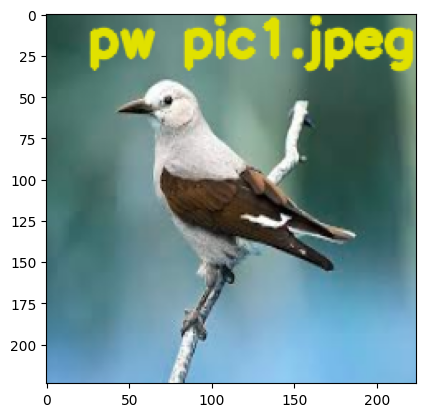

In [47]:
def predict(i,transferVGG,labels):
  path1=f"{directory}/{i}"
  img=cv2.imread(path1)
  img=cv2.resize(img,(224,224))
  a=np.argmax(transferVGG.predict(np.array([img])))
  img=cv2.putText(img,labels[a],(25,25),cv2.FONT_HERSHEY_SIMPLEX,1,(225,225,0),3,cv2.LINE_AA)
  plt.imshow(img)
predict("pw pic1.jpeg",transferVGG,classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step


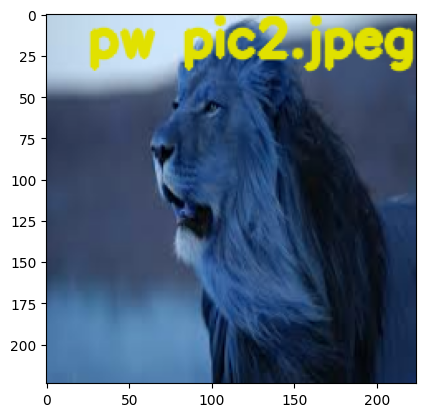

In [48]:
predict("pw pic2.jpeg",transferVGG,classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step


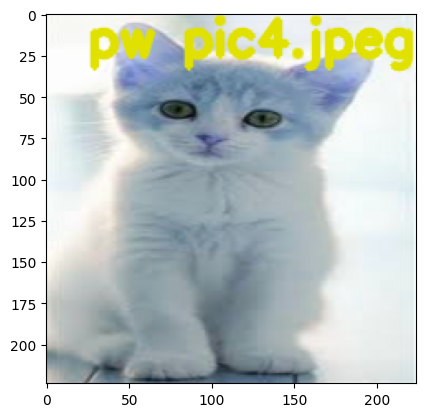

In [51]:
predict("pw pic4.jpeg",transferVGG,classes)